In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.options.display.max_columns = 999

# EDA for diabetes dataset

## 1. Data insight

### 1. Data import

In [2]:
data_model = pd.read_csv('data_train.csv', delimiter=',')
data_test = pd.read_csv('data_test.csv', delimiter=',')
data_model.drop(columns=['Id'], axis=1, inplace=True)
data_test.drop(columns=['Id'], axis=1, inplace=True)

#### 1.1. Train data

In [3]:
print(data_model.shape)
print(data_model.head().T)
print(data_model.tail().T)
print(data_model.info())
print(data_model.describe().T)

(202944, 24)
                       0   1   2    3   4
HighBP                 0   0   0    0   0
HighChol               0   0   0    1   1
CholCheck              1   1   1    1   1
BMI                   24  28  36   35  27
Smoker                 1   0   1    0   0
Stroke                 0   0   0    0   0
HeartDiseaseorAttack   0   0   0    0   0
PhysActivity           1   1   1    1   1
Fruits                 0   1   1    1   0
Veggies                1   1   0    1   1
HvyAlcoholConsump      0   0   0    0   0
AnyHealthcare          1   1   1    1   1
NoDocbcCost            0   0   1    0   0
GenHlth                2   1   3    3   3
MentHlth               0   1  30    0   0
PhysHlth               0   0  30    0   0
DiffWalk               0   0   1    0   0
Sex                    0   0   0    0   0
Age                    8   2   3    8   9
Education              4   6   2    6   5
Income                 5   8   1    8   4
ExtraMedTest          60   0 -46  -83 -58
ExtraAlcoholTest     

#### 1.2. Test data

In [4]:
print(data_test.shape)
print(data_test.head().T)
print(data_test.tail().T)
print(data_test.info())
print(data_test.describe().T)

(50736, 24)
                          0      1     2     3     4
HighBP                  1.0    0.0   0.0   0.0   1.0
HighChol                1.0    0.0   0.0   0.0   0.0
CholCheck               1.0    1.0   1.0   1.0   1.0
BMI                    30.0   27.0  21.0  24.0  34.0
Smoker                  1.0    1.0   0.0   1.0   0.0
Stroke                  0.0    0.0   0.0   0.0   0.0
HeartDiseaseorAttack    1.0    0.0   0.0   0.0   0.0
PhysActivity            1.0    0.0   1.0   1.0   1.0
Fruits                  1.0    0.0   1.0   1.0   1.0
Veggies                 1.0    1.0   1.0   1.0   0.0
HvyAlcoholConsump       0.0    0.0   0.0   0.0   0.0
AnyHealthcare           1.0    1.0   1.0   1.0   1.0
NoDocbcCost             0.0    0.0   0.0   0.0   0.0
GenHlth                 2.0    1.0   3.0   4.0   4.0
MentHlth                3.0    0.0   0.0   0.0   0.0
PhysHlth                0.0   30.0   5.0  30.0   1.0
DiffWalk                0.0    1.0   0.0   0.0   1.0
Sex                     1.0    1.0

#### 1.3. Understanding all features

| Index | Explanation |
|-------|-------------|
|ID|Patient ID|
|HighBP|High blood pressure|
|HighChol|High cholesterol|
|BMI|Body Mass Index|
|Smoker|Determine 

#### 1.4. Getting minimum and maximum values for test and train data

In [5]:
print('----Train data min - max value----')
print(data_model.min())
print()
print(data_model.max())

print("\n\n\n\n")
print('----Test data min - max value----')
print(data_test.min())
print()
print(data_test.max())


----Train data min - max value----
HighBP                    0
HighChol                  0
CholCheck                 0
BMI                      12
Smoker                    0
Stroke                    0
HeartDiseaseorAttack      0
PhysActivity              0
Fruits                    0
Veggies                   0
HvyAlcoholConsump         0
AnyHealthcare             0
NoDocbcCost               0
GenHlth                   1
MentHlth                  0
PhysHlth                  0
DiffWalk                  0
Sex                       0
Age                       1
Education                 1
Income                    1
ExtraMedTest           -199
ExtraAlcoholTest       -199
Status                    0
dtype: int64

HighBP                    1
HighChol                  1
CholCheck                 1
BMI                      98
Smoker                    1
Stroke                    1
HeartDiseaseorAttack      1
PhysActivity              1
Fruits                    1
Veggies                   1

From the above observation, we can see 2 abnormal features:
- ExtraMedTest and ExtraAlcoholTest from test dataset exceed the value range between -100 and 100
- BMI's max and min values from both datasets are too high and low at the same time [link]. We need to investigate more into these data

##### Abnormal features' distribution observation

###### Test dataset ExtraMedTest and ExtraAlcoholTest abnomalities

<Axes: title={'center': 'ExtraMedTest value count'}, xlabel='ExtraMedTest', ylabel='Count'>

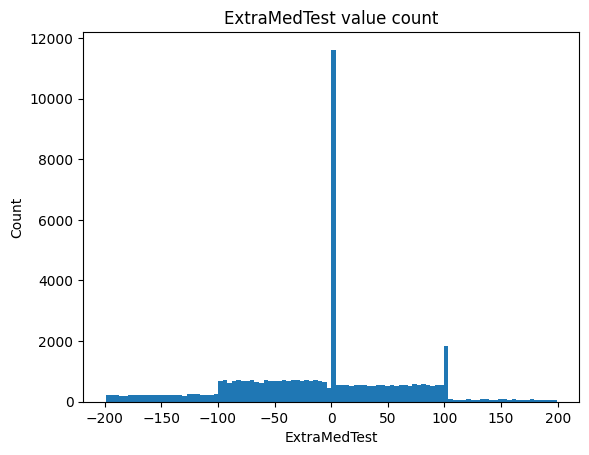

In [6]:
#ExtraMedTest value count
data_test['ExtraMedTest'].plot(kind='hist', bins=100, xlabel='ExtraMedTest', ylabel='Count', title='ExtraMedTest value count')

<Axes: xlabel='ExtraAlcoholTest', ylabel='Frequency'>

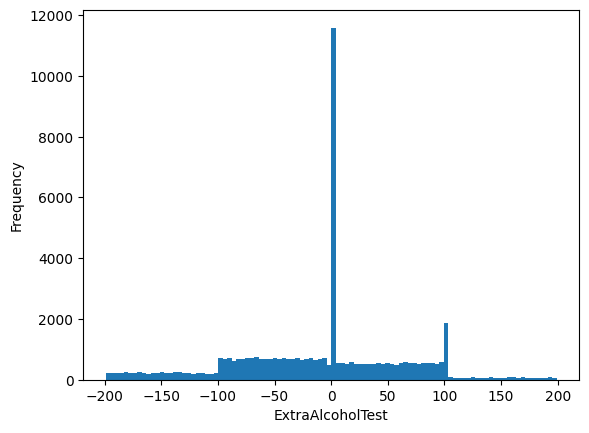

In [7]:
#ExtraAlcoholTest data distribution
data_test['ExtraAlcoholTest'].plot(kind='hist', bins=100, xlabel='ExtraAlcoholTest', ylabel='Frequency')

Despite a large distribution of both features in the given range of (-100, 100), the data still observe large falsely input data, espcially data in range (-200, -100). Hence, we need to reduce the data to our desired range

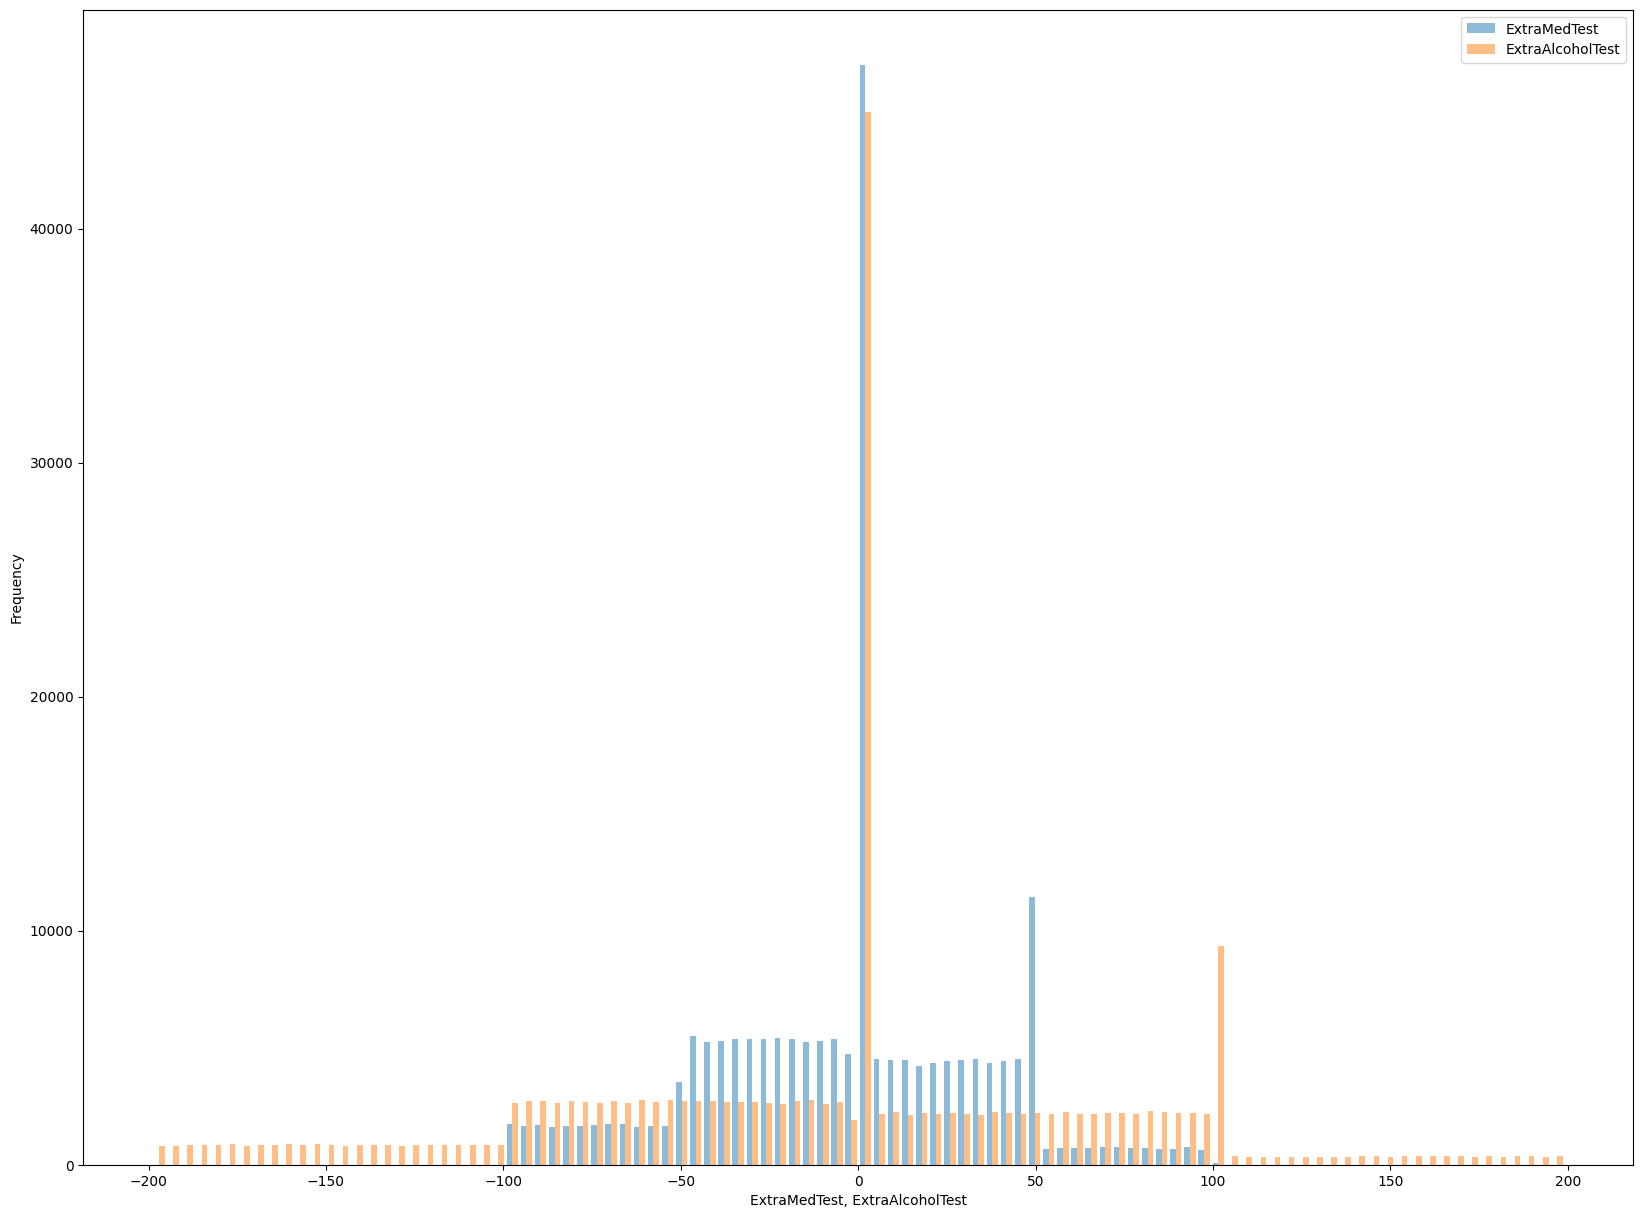

In [8]:
data_model['ExtraMedTest'] = data_model['ExtraMedTest']/2
data_test['ExtraMedTest'] = data_test['ExtraMedTest']/2
plt.figure(figsize=(20, 15))
plt.hist(data_model[['ExtraMedTest', 'ExtraAlcoholTest']], bins=100, alpha=0.5, label=['ExtraMedTest', 'ExtraAlcoholTest'])
plt.xlabel('ExtraMedTest, ExtraAlcoholTest')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

###### BMI abnormality

First, we will plot to see the distribution of BMI in the dataset

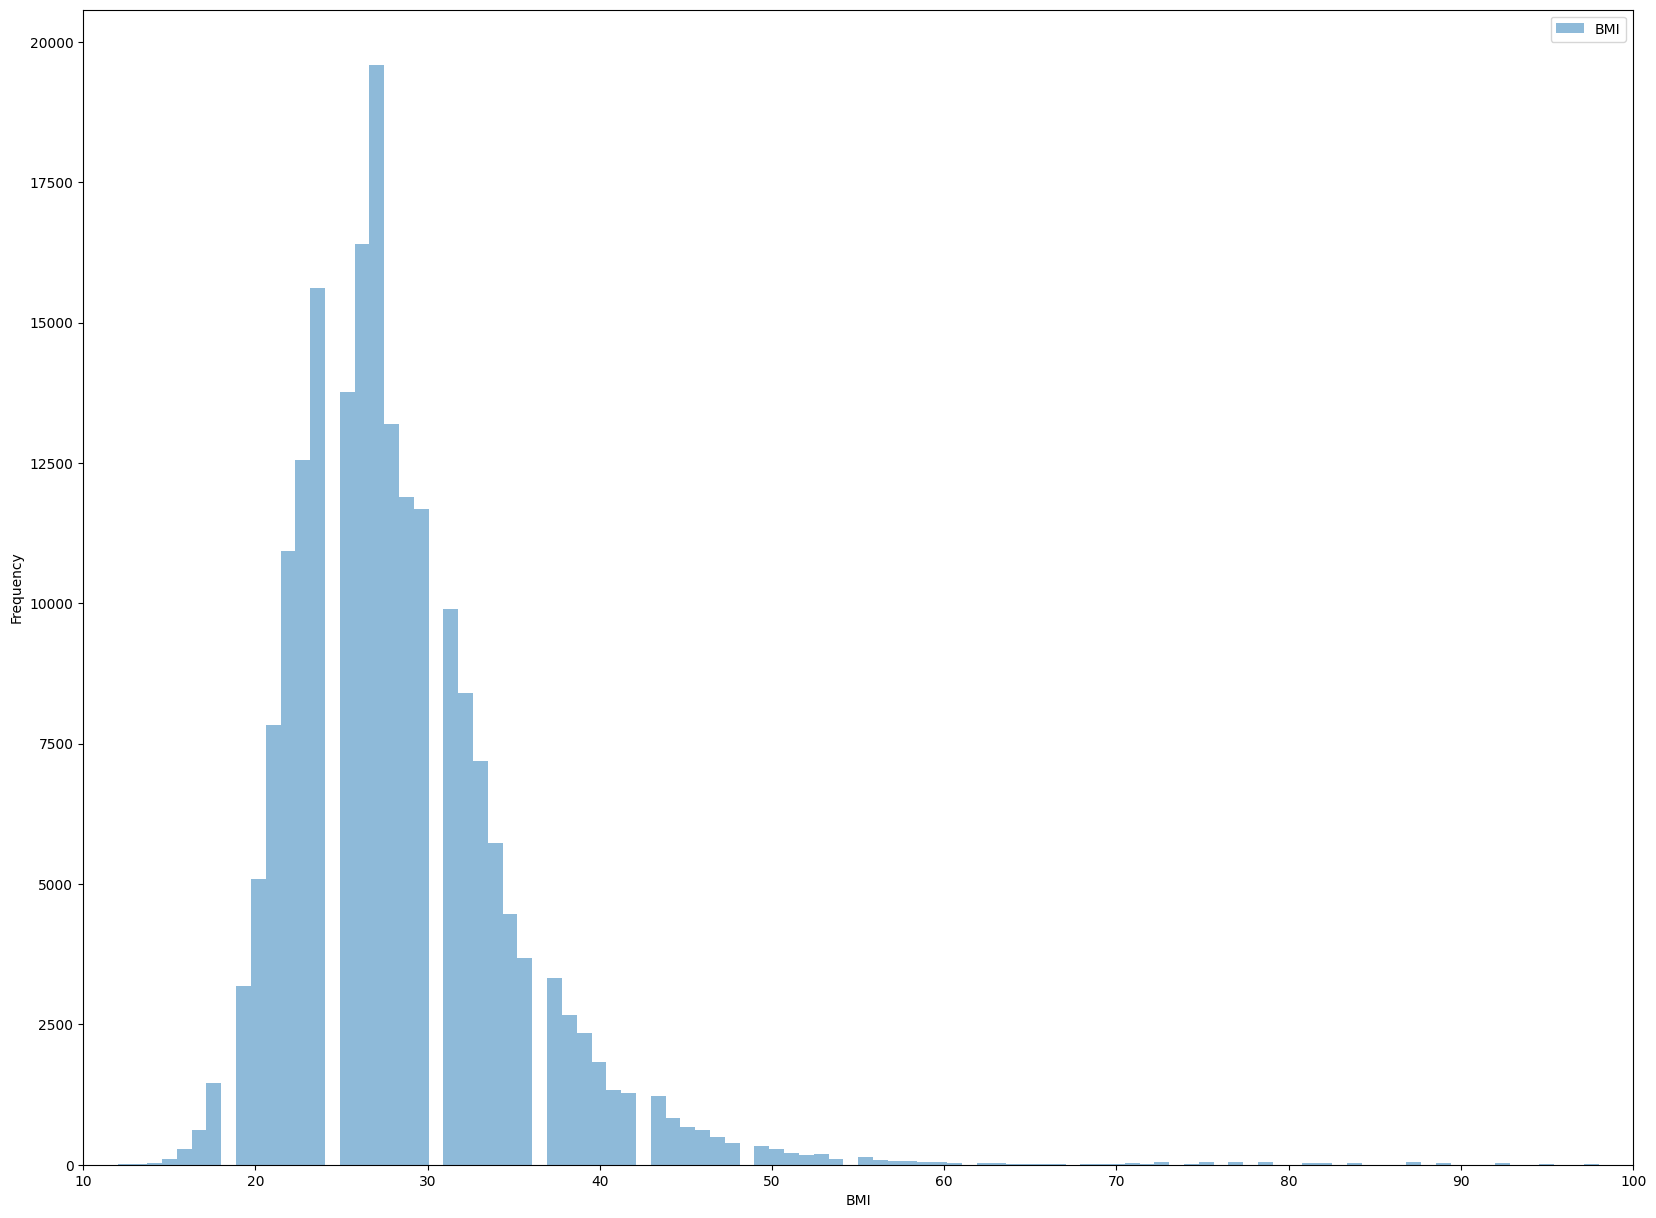

In [9]:
plt.figure(figsize=(20, 15))
plt.hist(data_model['BMI'], bins=100, alpha=0.5, label='BMI')
plt.xlim(left = 10, right = 100)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

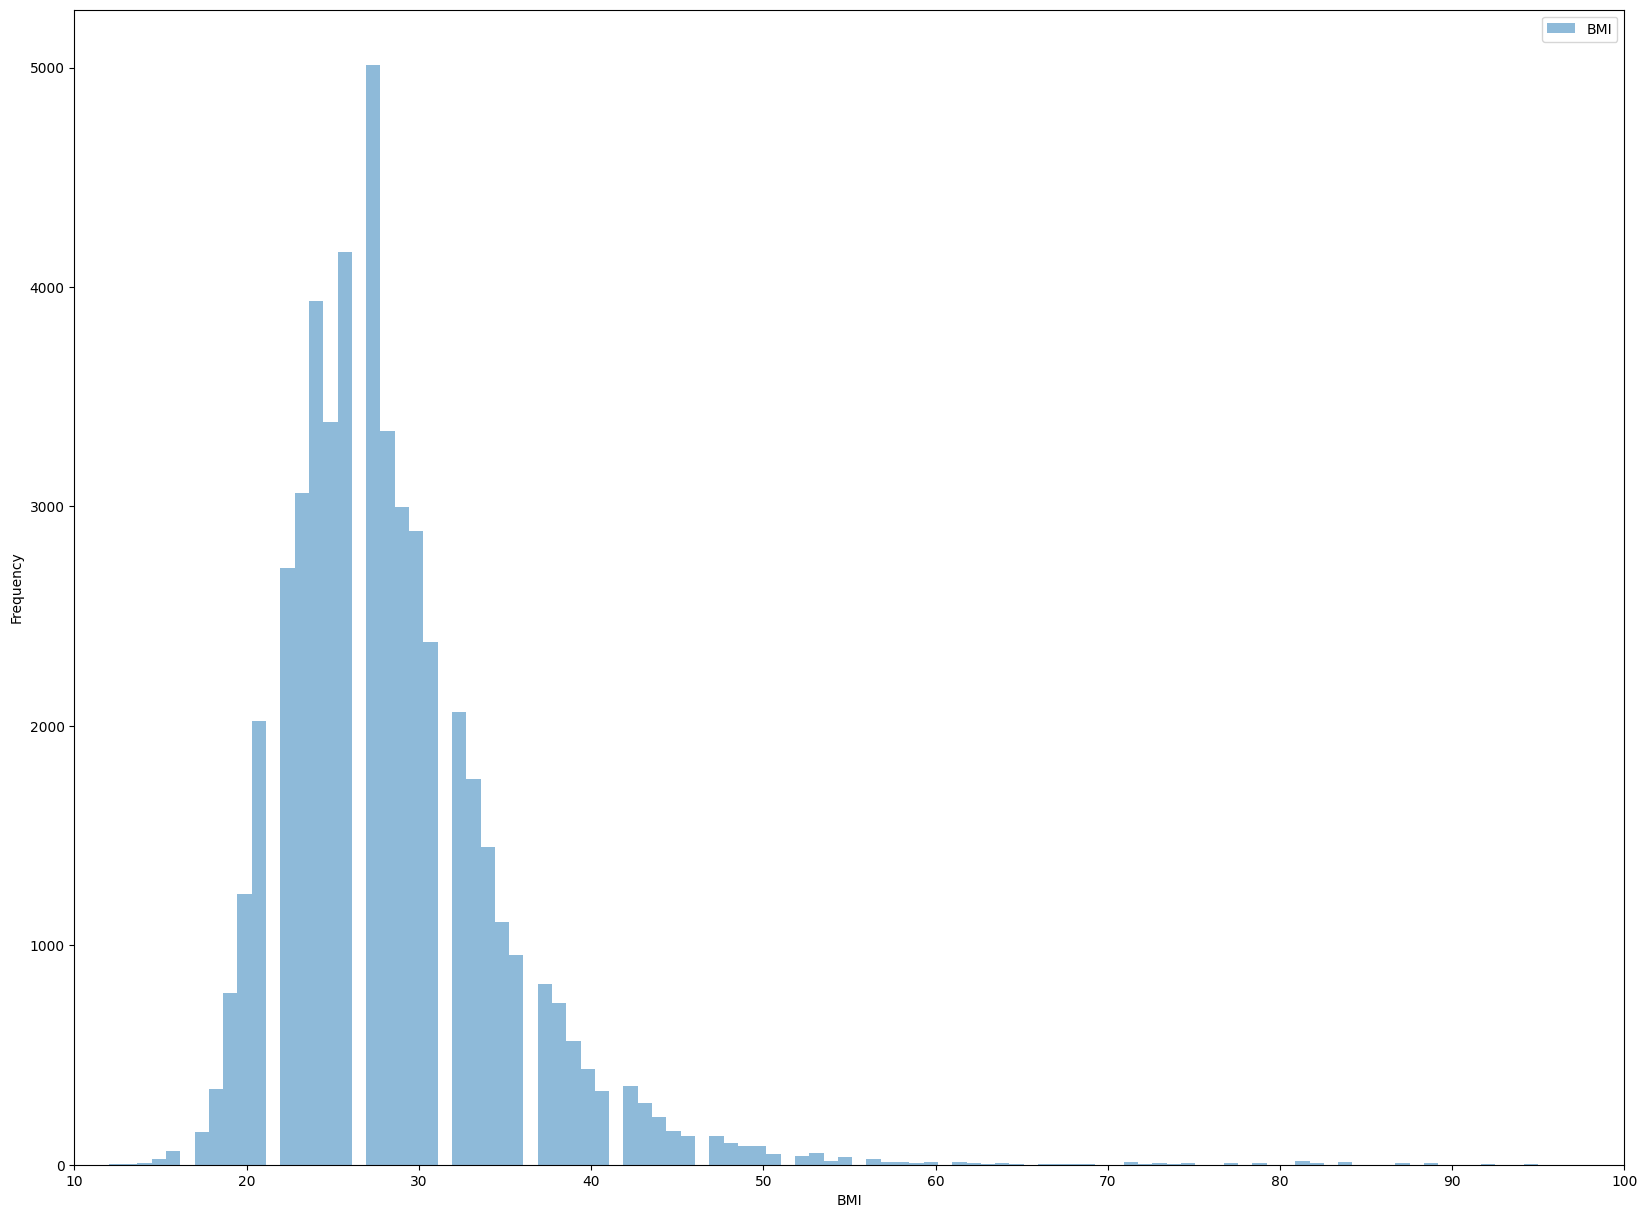

In [10]:
plt.figure(figsize=(20, 15))
plt.hist(data_test['BMI'], bins=100, alpha=0.5, label='BMI')
plt.xlim(left = 10, right = 100)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

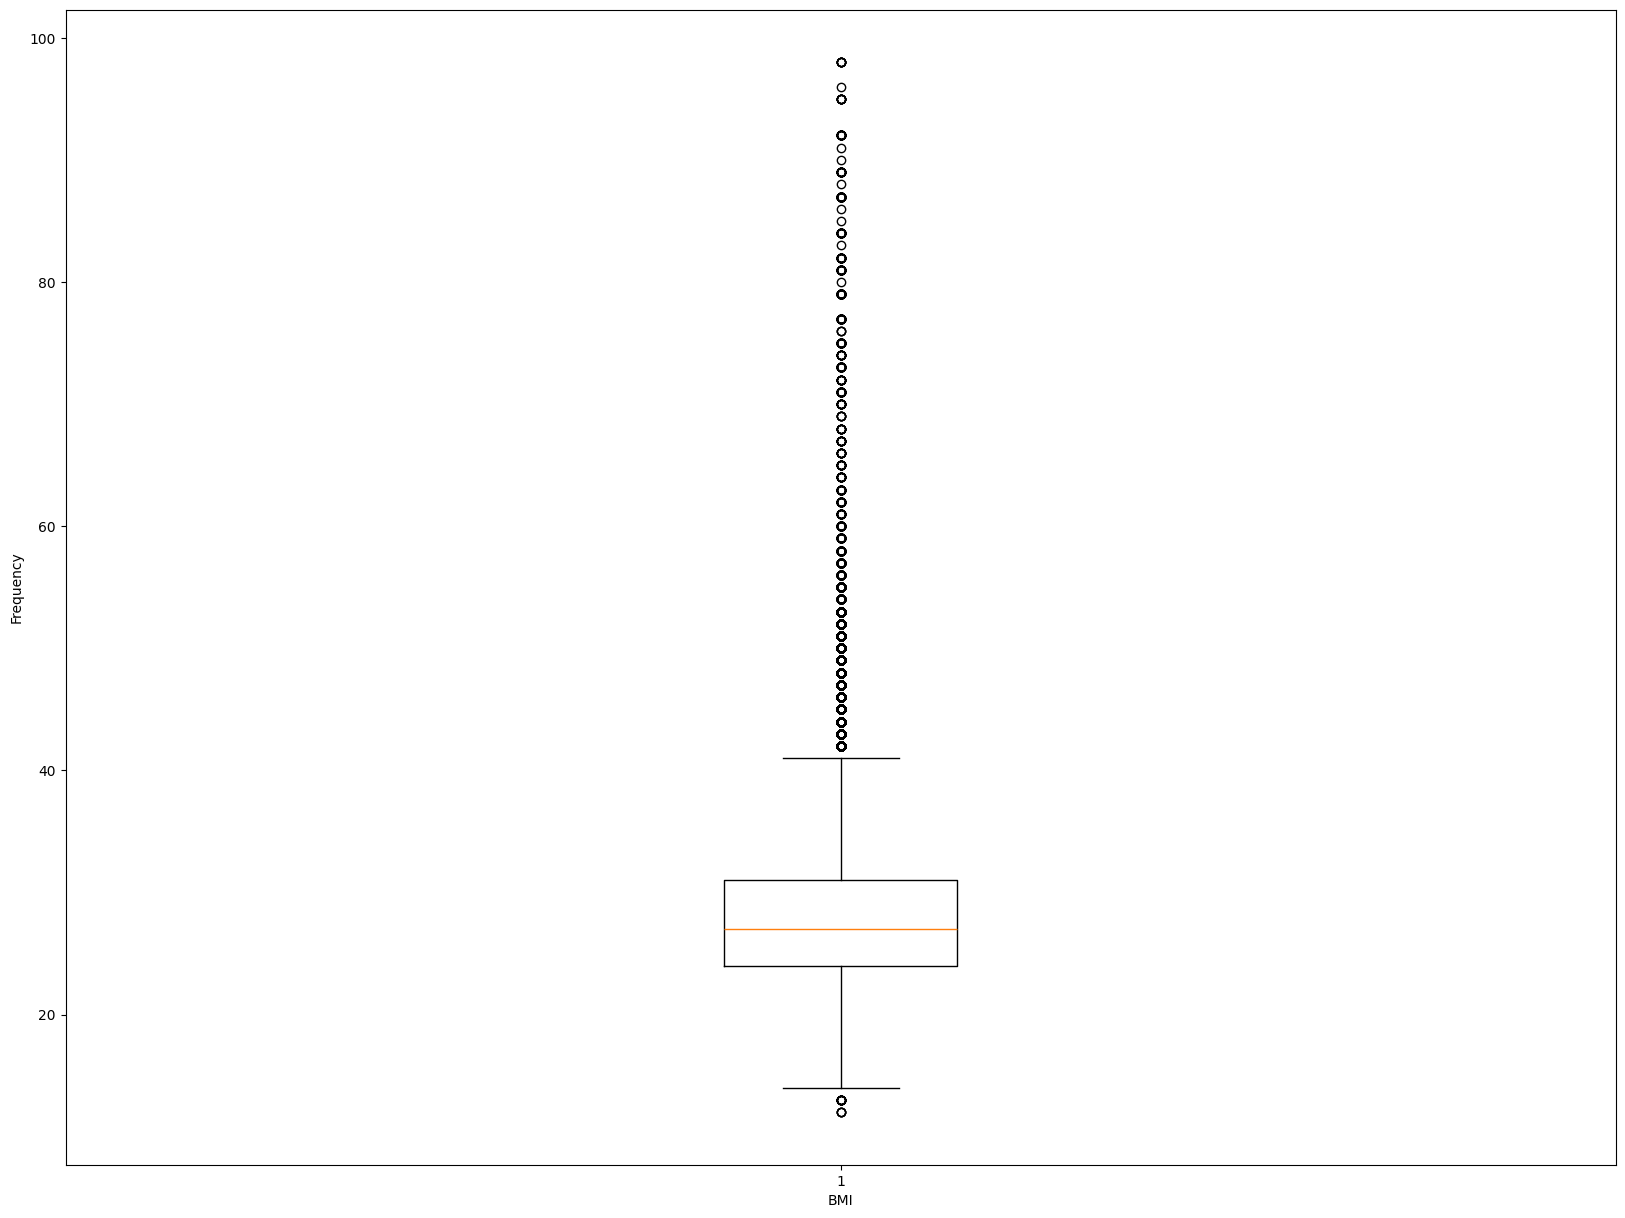

In [11]:
plt.figure(figsize=(20, 15))
plt.boxplot(data_model['BMI'])
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


#### 1.5. Checking for missing / null value

In [12]:
data_model.nunique()

HighBP                    2
HighChol                  2
CholCheck                 2
BMI                      83
Smoker                    2
Stroke                    2
HeartDiseaseorAttack      2
PhysActivity              2
Fruits                    2
Veggies                   2
HvyAlcoholConsump         2
AnyHealthcare             2
NoDocbcCost               2
GenHlth                   5
MentHlth                 31
PhysHlth                 31
DiffWalk                  2
Sex                       2
Age                      13
Education                 6
Income                    8
ExtraMedTest            399
ExtraAlcoholTest        399
Status                    2
dtype: int64

By investigating into unique value, with reference to the code book, we can determine that BMI, MenHlth, PhysHlth, ExtraMedTest and ExtraAlcoholTest are numerical features, and the remaining are categorical ones.

In [13]:
data_model.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

The result show no null value from this dataset

In [14]:
print(data_model.duplicated().sum())
data_model_duplicated = data_model[data_model.duplicated()]
data_model_duplicated.head()

208


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
20272,0,0,1,23,0,0,0,1,1,1,0,1,0,1,0,0,0,0,9,6,8,0.0,0,0
22582,0,0,1,26,0,0,0,1,1,1,0,1,0,1,0,0,0,1,5,6,8,0.0,0,0
23322,0,0,1,22,0,0,0,1,1,1,0,1,0,2,0,0,0,0,3,6,8,0.0,0,0
23790,0,1,1,24,0,0,0,1,1,1,0,1,0,2,0,0,0,1,9,6,8,0.0,0,0
25615,0,0,1,23,0,0,0,1,1,1,0,1,0,1,0,0,0,0,6,6,8,0.0,0,0


There are 208 duplicated rows from the train dataset. In this case, we will drop all duplicated rows

In [15]:
data_model.drop_duplicates(inplace=True)
print(data_model.shape)
print(data_model.duplicated().sum())

(202736, 24)
0


Finally, we will observe the distribution of the whole training and testing dataset

array([[<Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoker'}>],
       [<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>,
        <Axes: title={'center': 'Veggies'}>],
       [<Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>,
        <Axes: title={'center': 'MentHlth'}>],
       [<Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center'

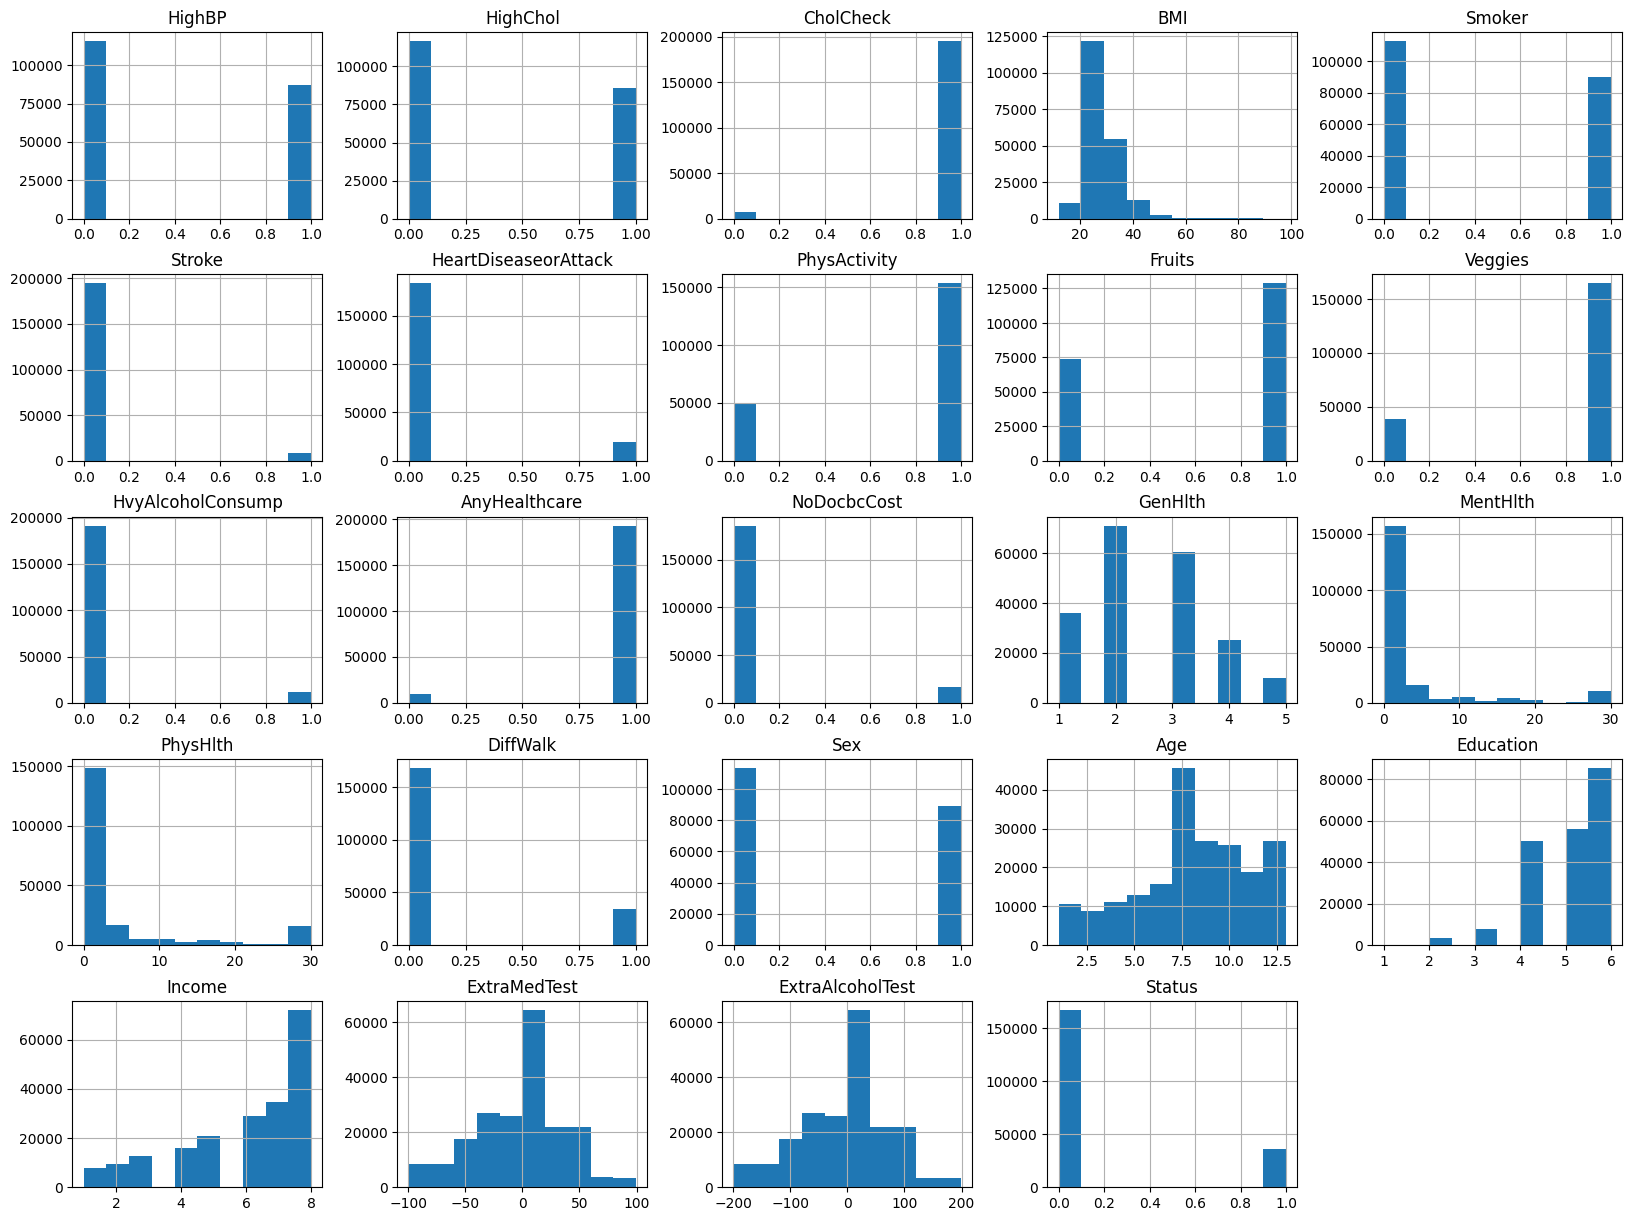

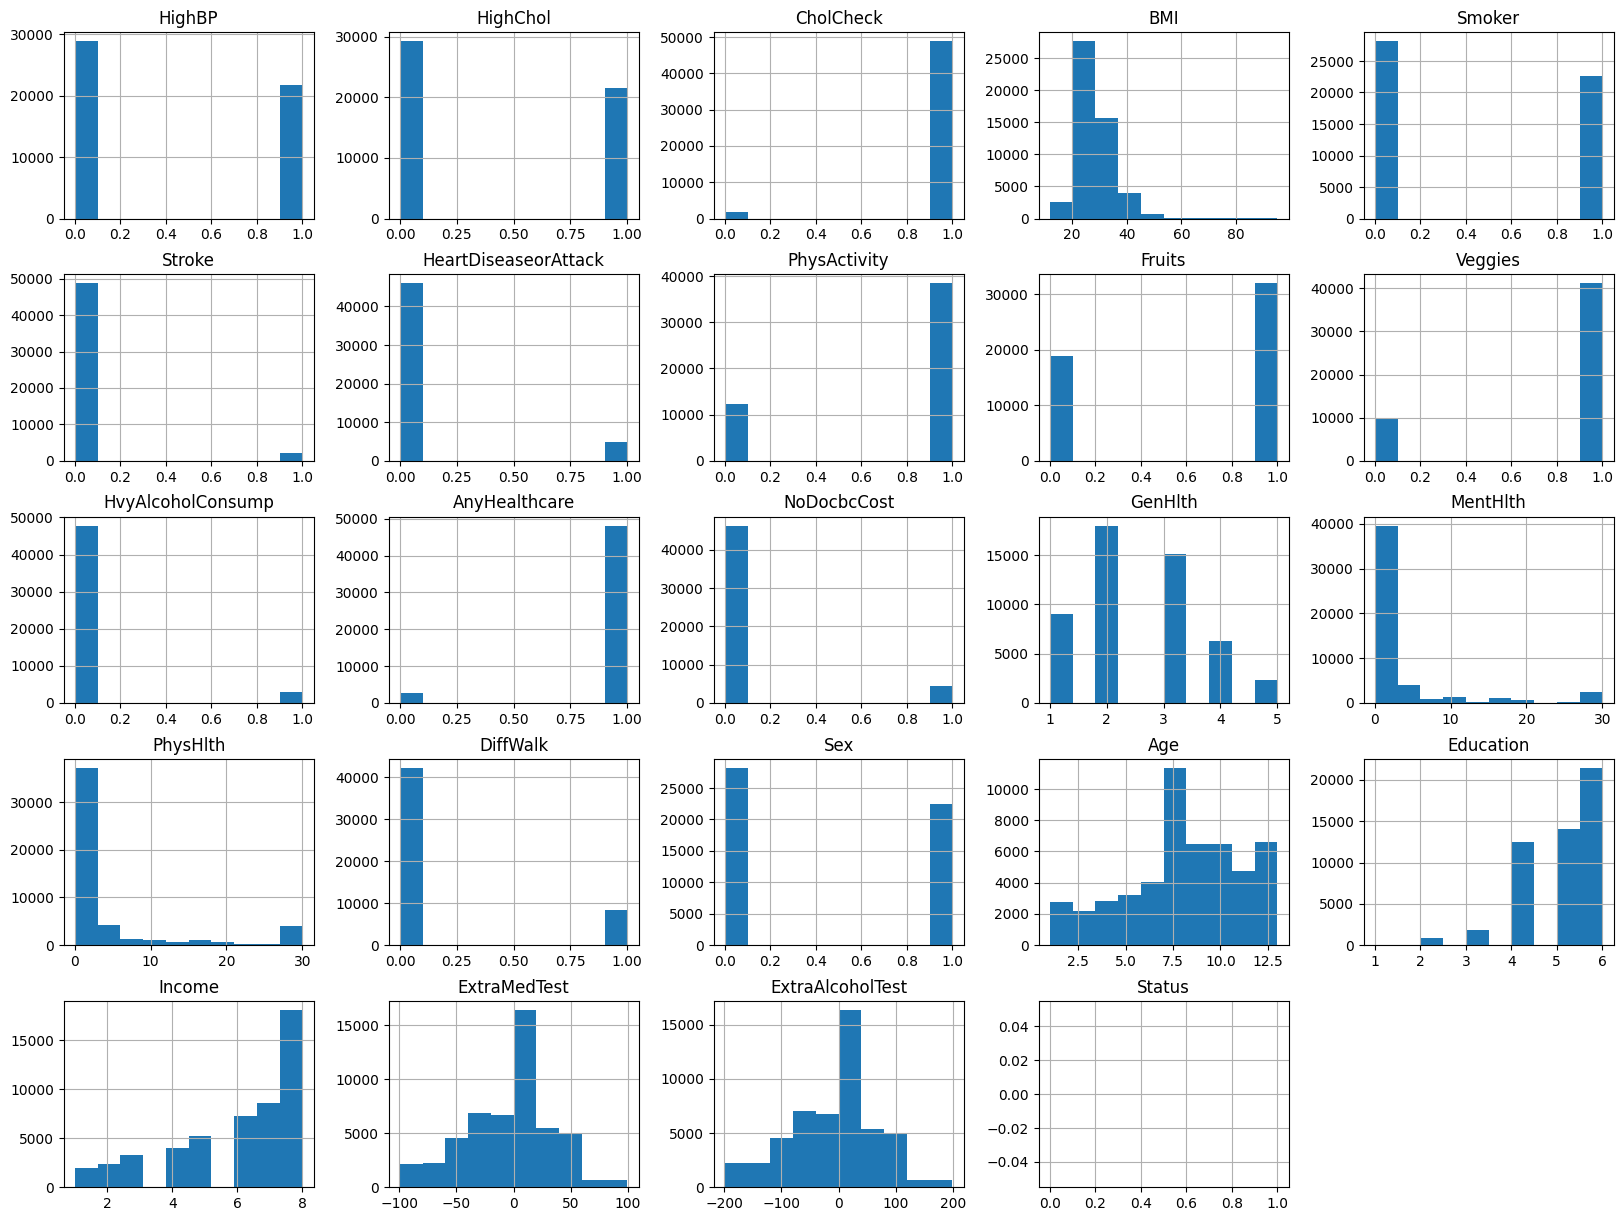

In [16]:
data_model.hist(figsize=(20, 15))
data_test.hist(figsize=(20, 15))

## 2. Univariate data analysis

In [17]:
def uni_stat_summary(column: str) -> None:
    counts_train =  data_model[column].value_counts()
    percentage_train = data_model[column].value_counts(normalize=True)

    counts_test =  data_test[column].value_counts()
    percentage_test = data_test[column].value_counts(normalize=True)

    print(f'----{column}----')
    print('Train data')
    print(pd.concat([counts_train, percentage_train], axis=1, keys=['Counts', 'Percentage']))
    print()
    print('Test data')
    print(pd.concat([counts_test, percentage_test], axis=1, keys=['Counts', 'Percentage']))
    print()
    print(pd.concat(
    [
        data_model[column].describe(), 
        data_test[column].describe()
    ], 
    axis=1,
    keys=['data_model', 'data_test']
    )
)


In [18]:
def uni_cat_plot(column: str, labels_list: list) -> None:
    fig, axes = plt.subplots(1, 3, figsize=(12, 8), sharex=False, sharey=False)
    
    
    labels_train = []
    labels_test = []
    for i in labels_list:
        labels_train.append(f'{i} (train)')
        labels_test.append(f'{i} (test)')
    
    axes[1].pie(data_model[column].value_counts(), labels=labels_train, autopct='%1.1f%%', startangle=90, colors=['salmon', 'chocolate'], shadow=False)
    axes[1].set_title('Train data')
    axes[2].pie(data_test[column].value_counts(), labels=labels_test, autopct='%1.1f%%', startangle=90, colors=['deeppink', 'limegreen'], shadow=False)
    axes[2].set_title('Test data')

    sns.barplot(x=data_model[column].value_counts().index, y=data_model[column].value_counts().values, color='slateblue', alpha=0.5, ax=axes[0])
    sns.barplot(x=data_test[column].value_counts().index, y=data_test[column].value_counts().values, color='palegreen', alpha=0.5, ax=axes[0])
    
    fig.legend()
    plt.show()

### 2.1. Getting data distribution

#### 2.1.1. HighBP analysis

Categorical data:
- 0: no high blood pressure (low)
- 1: high blood pressure (high)

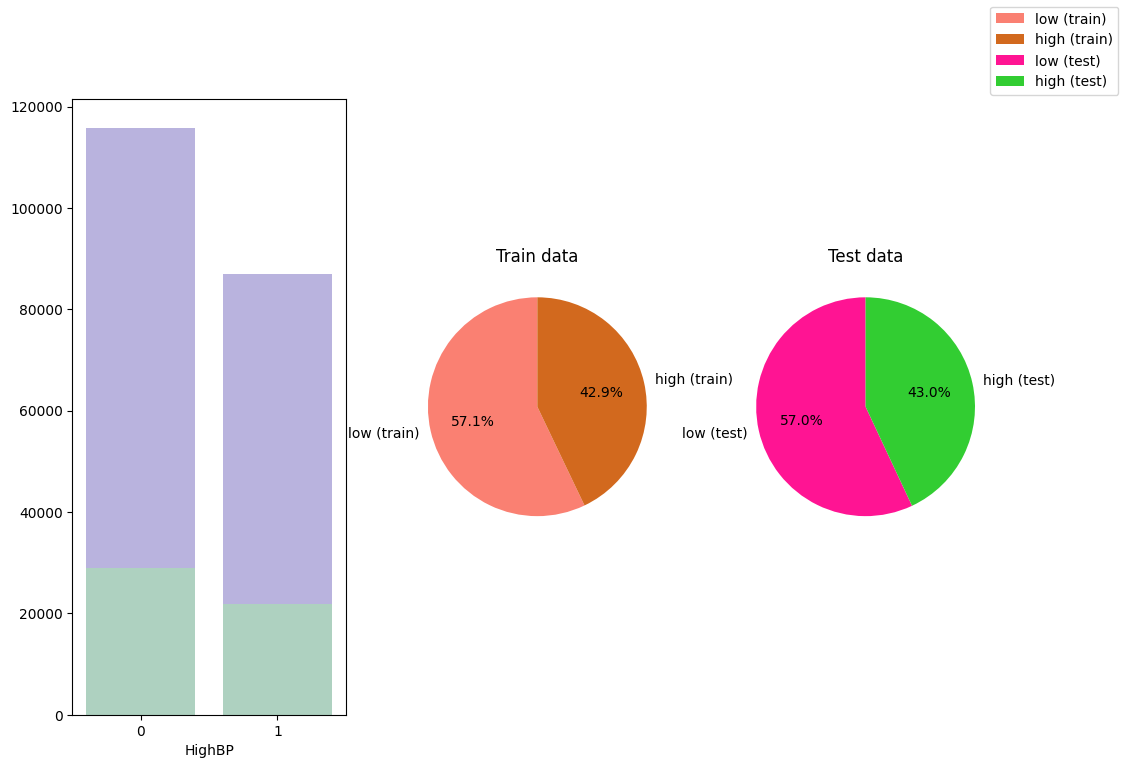

----HighBP----
Train data
        Counts  Percentage
HighBP                    
0       115750     0.57094
1        86986     0.42906

Test data
        Counts  Percentage
HighBP                    
0        28909    0.569793
1        21827    0.430207

          data_model     data_test
count  202736.000000  50736.000000
mean        0.429060      0.430207
std         0.494943      0.495110
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [19]:
uni_cat_plot('HighBP', ['low', 'high'])
uni_stat_summary(column='HighBP')

#### 2.1.2. HighChol analysis

Categorical Data:
- 0: no high cholesterol (low)
- 1: high cholesterol (high)

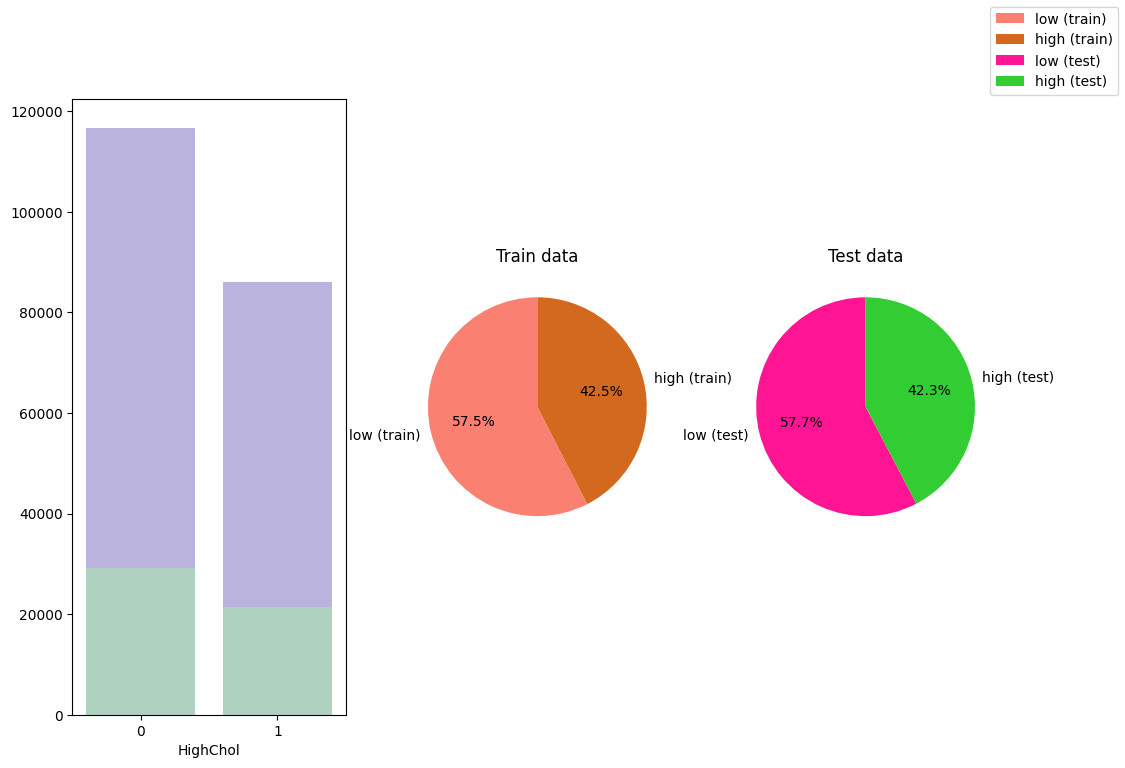

----HighChol----
Train data
          Counts  Percentage
HighChol                    
0         116648    0.575369
1          86088    0.424631

Test data
          Counts  Percentage
HighChol                    
0          29263     0.57677
1          21473     0.42323

          data_model     data_test
count  202736.000000  50736.000000
mean        0.424631      0.423230
std         0.494288      0.494076
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [21]:
uni_cat_plot('HighChol', ['low', 'high'])
uni_stat_summary(column='HighChol')

#### 2.1.3. CholCheck Analysis

Catgorical data:
- 0: don't have cholesterol check
- 1: have cholesterol check

Duration: 5 years

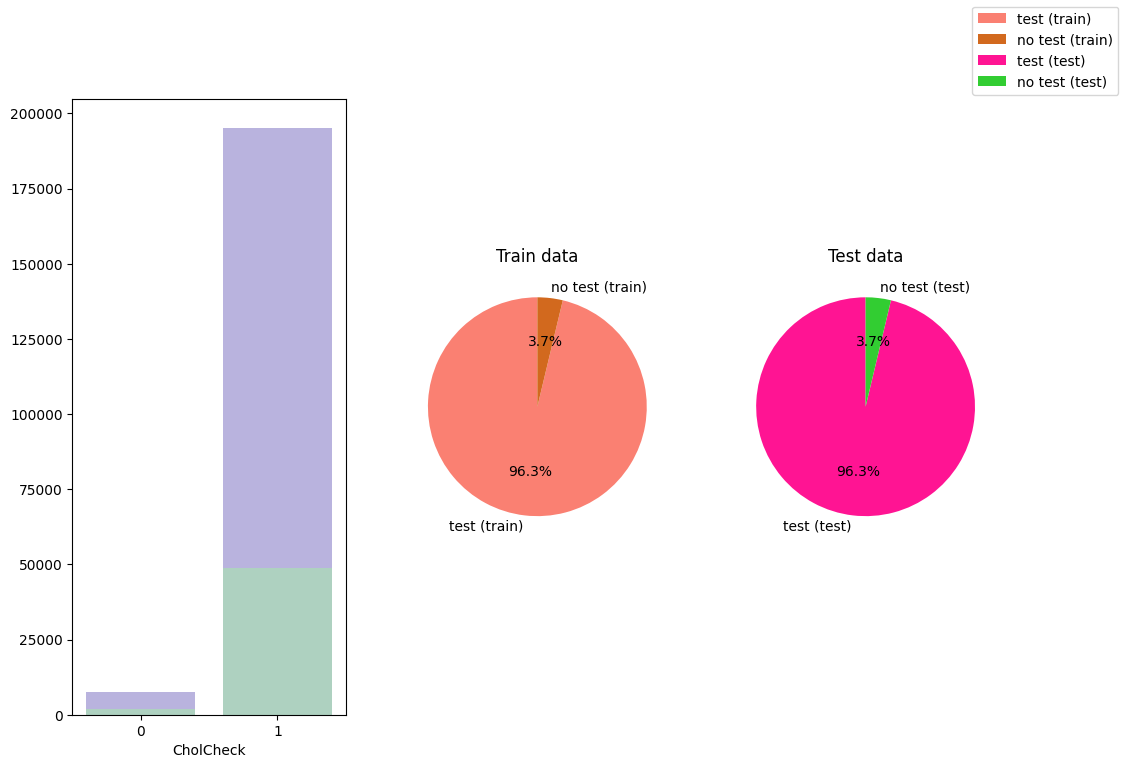

----CholCheck----
Train data
           Counts  Percentage
CholCheck                    
1          195158    0.962621
0            7578    0.037379

Test data
           Counts  Percentage
CholCheck                    
1           48845    0.962729
0            1891    0.037271

          data_model     data_test
count  202736.000000  50736.000000
mean        0.962621      0.962729
std         0.189688      0.189428
min         0.000000      0.000000
25%         1.000000      1.000000
50%         1.000000      1.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [22]:
uni_cat_plot('CholCheck', ['test', 'no test'])
uni_stat_summary(column='CholCheck')

#### 2.1.4. Smoker analysis

Categorical data:
- 0: not a smoker / have yet to smoke enough
- 1: smoker

Quantity: 100 cigarrets (5 pack)
Duration: lifetime

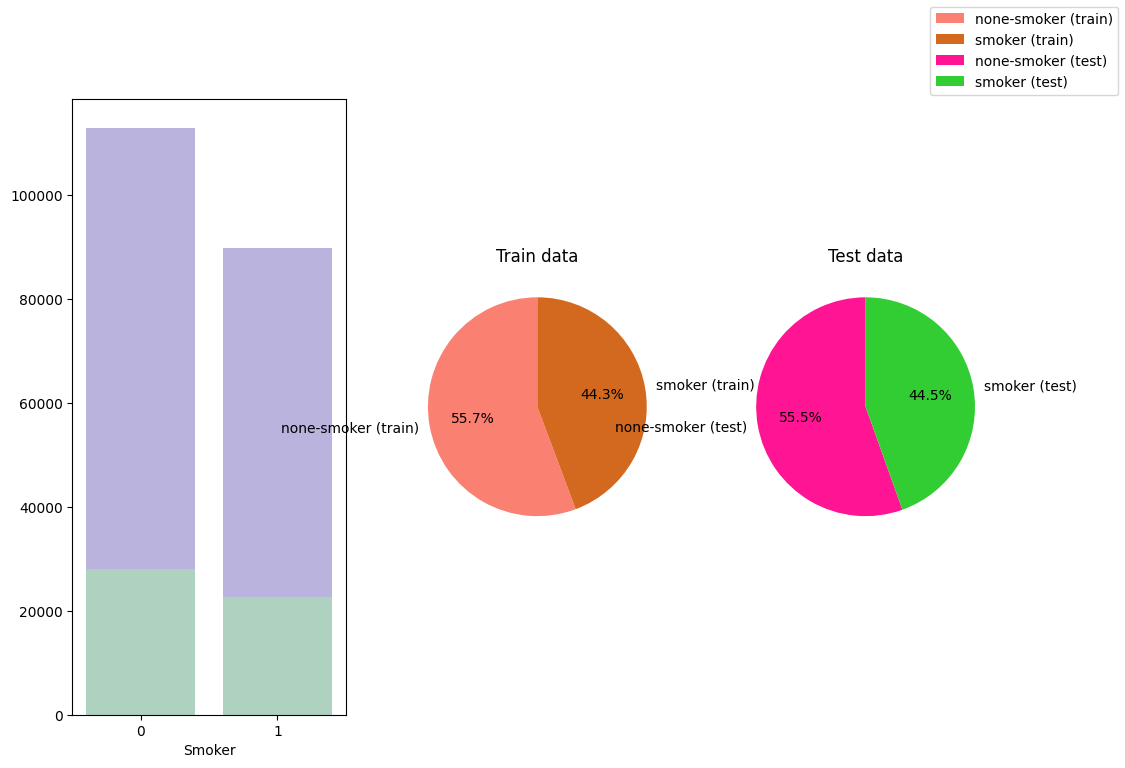

----Smoker----
Train data
        Counts  Percentage
Smoker                    
0       112930     0.55703
1        89806     0.44297

Test data
        Counts  Percentage
Smoker                    
0        28143    0.554695
1        22593    0.445305

          data_model     data_test
count  202736.000000  50736.000000
mean        0.442970      0.445305
std         0.496738      0.497004
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [23]:
uni_cat_plot('Smoker', ['none-smoker', 'smoker'])
uni_stat_summary(column='Smoker')


#### 2.1.5. Stroke analysis

Categorical data:
- 0: not aware(*) of stroke
- 1: aware of stroke

(*): aware of stroke means that the patient has been told or have experienced stroke

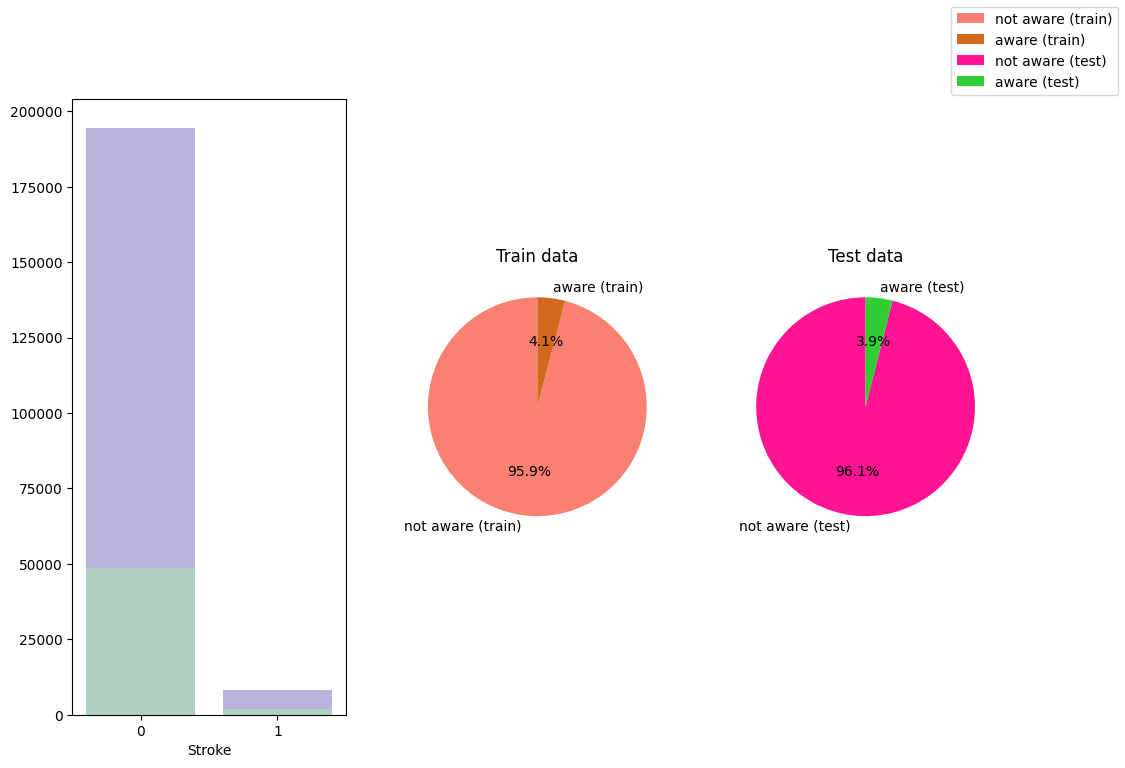

----Stroke----
Train data
        Counts  Percentage
Stroke                    
0       194447    0.959114
1         8289    0.040886

Test data
        Counts  Percentage
Stroke                    
0        48733    0.960521
1         2003    0.039479

          data_model     data_test
count  202736.000000  50736.000000
mean        0.040886      0.039479
std         0.198026      0.194733
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.000000      1.000000


In [24]:
uni_cat_plot('Stroke', ['not aware', 'aware'])
uni_stat_summary(column='Stroke')

#### 2.1.6. Heart disease or attack analysis

Categorical data:
- 0: don't have CHD(*) or MI(**)
- 1: have CHD or MI

(*): coronary heart disease
(**): myocardial infraction


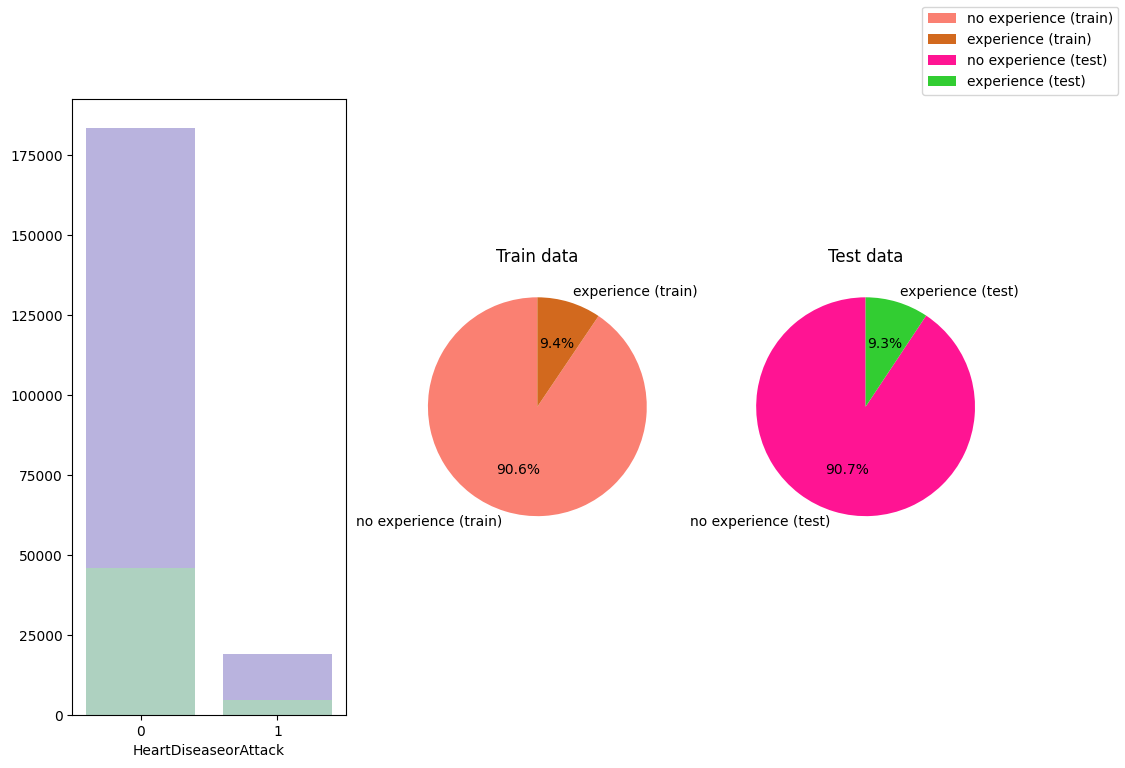

----HeartDiseaseorAttack----
Train data
                      Counts  Percentage
HeartDiseaseorAttack                    
0                     183580    0.905513
1                      19156    0.094487

Test data
                      Counts  Percentage
HeartDiseaseorAttack                    
0                      45999    0.906634
1                       4737    0.093366

          data_model     data_test
count  202736.000000  50736.000000
mean        0.094487      0.093366
std         0.292506      0.290947
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.000000      1.000000


In [25]:
uni_cat_plot('HeartDiseaseorAttack', ['no experience', 'experience'])
uni_stat_summary(column='HeartDiseaseorAttack')

#### 2.1.7. Fruits analysis

Categorical data:
- 0: fruit none-consumer
- 1: fruit consumer

Criterion: Consuming fruit at least once a day

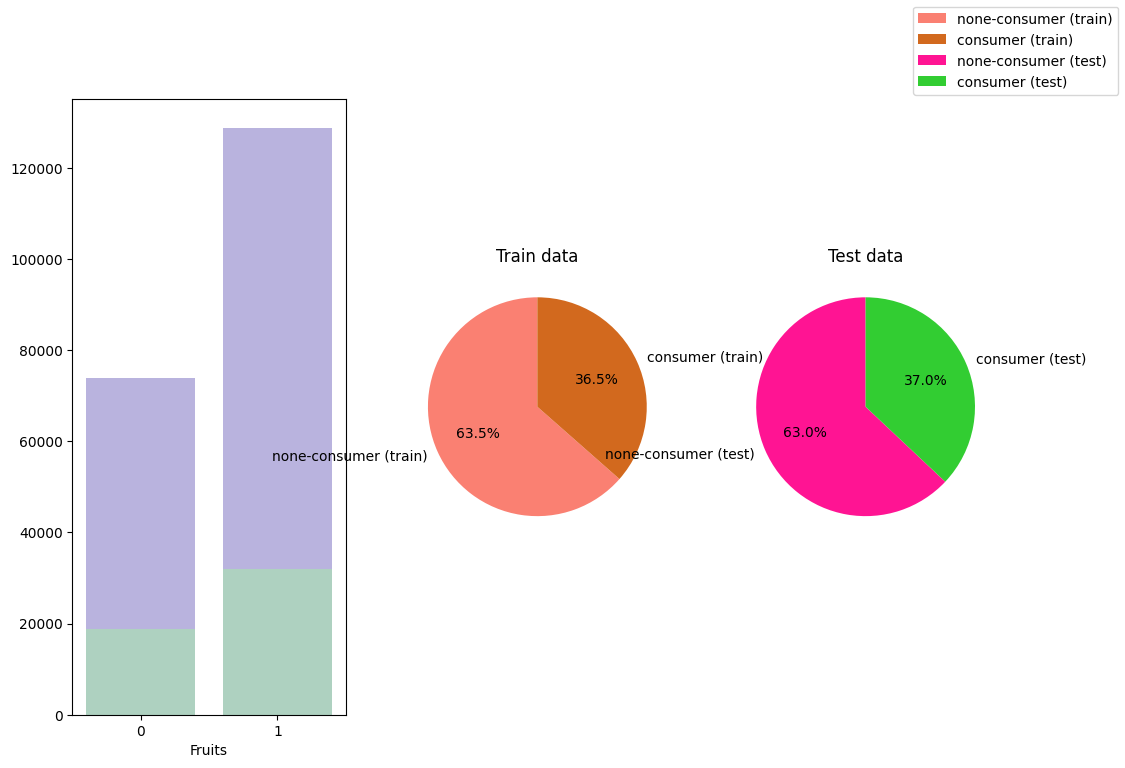

----Fruits----
Train data
        Counts  Percentage
Fruits                    
1       128753    0.635077
0        73983    0.364923

Test data
        Counts  Percentage
Fruits                    
1        31953    0.629789
0        18783    0.370211

          data_model     data_test
count  202736.000000  50736.000000
mean        0.635077      0.629789
std         0.481410      0.482866
min         0.000000      0.000000
25%         0.000000      0.000000
50%         1.000000      1.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [26]:
uni_cat_plot('Fruits', ['none-consumer', 'consumer'])
uni_stat_summary(column='Fruits')

#### 2.1.8. Veggies analysis

Catgorical data:
- 0: vegetable none-consumer
- 1: vegetable consumer

Criterion: consuming vegetable(s) at least once a day

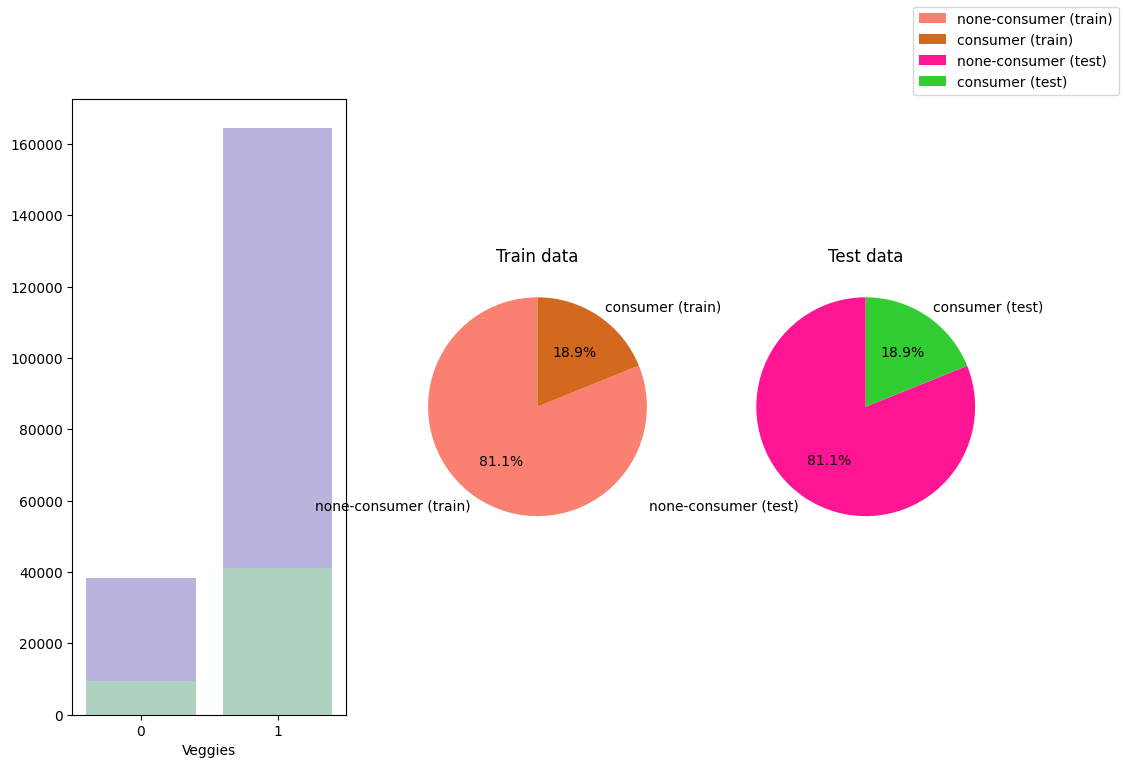

----Veggies----
Train data
         Counts  Percentage
Veggies                    
1        164488    0.811341
0         38248    0.188659

Test data
         Counts  Percentage
Veggies                    
1         41148    0.811022
0          9588    0.188978

          data_model     data_test
count  202736.000000  50736.000000
mean        0.811341      0.811022
std         0.391239      0.391495
min         0.000000      0.000000
25%         1.000000      1.000000
50%         1.000000      1.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [27]:
uni_cat_plot('Veggies', ['none-consumer', 'consumer'])
uni_stat_summary(column='Veggies')

#### 2.1.9. Heavy Alcohol Consumption analysis

Categorical data:
- 0: heavy alcohol none-consumer
- 1: heavy alcohol consumer

Criteria:
- Men: over 14 drinks/week
- Women: over 7 drinks/week

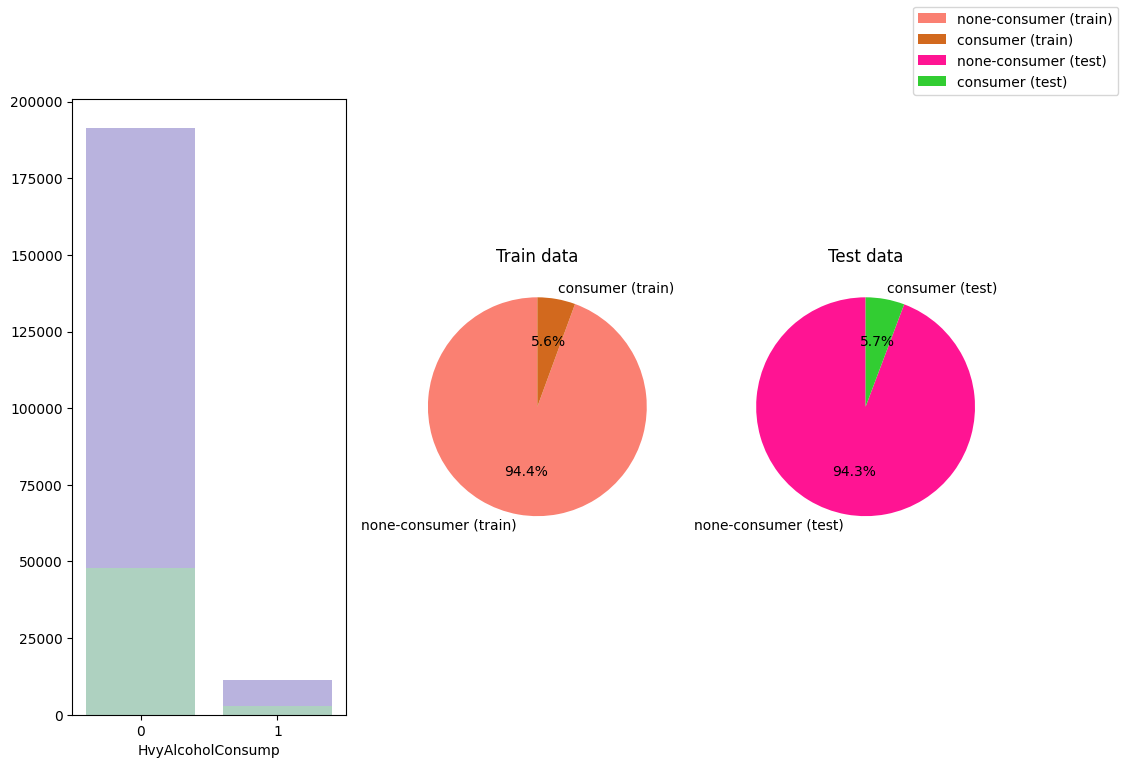

----HvyAlcoholConsump----
Train data
                   Counts  Percentage
HvyAlcoholConsump                    
0                  191389    0.944031
1                   11347    0.055969

Test data
                   Counts  Percentage
HvyAlcoholConsump                    
0                   47827    0.942664
1                    2909    0.057336

          data_model     data_test
count  202736.000000  50736.000000
mean        0.055969      0.057336
std         0.229863      0.232486
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.000000      1.000000


In [29]:
uni_cat_plot('HvyAlcoholConsump', ['none-consumer', 'consumer'])
uni_stat_summary(column='HvyAlcoholConsump')

#### 2.1.10. AnyHealthCare analysis

Categorical data:
- 0: don't have healthcare coverage
- 1: have healthcare coverage

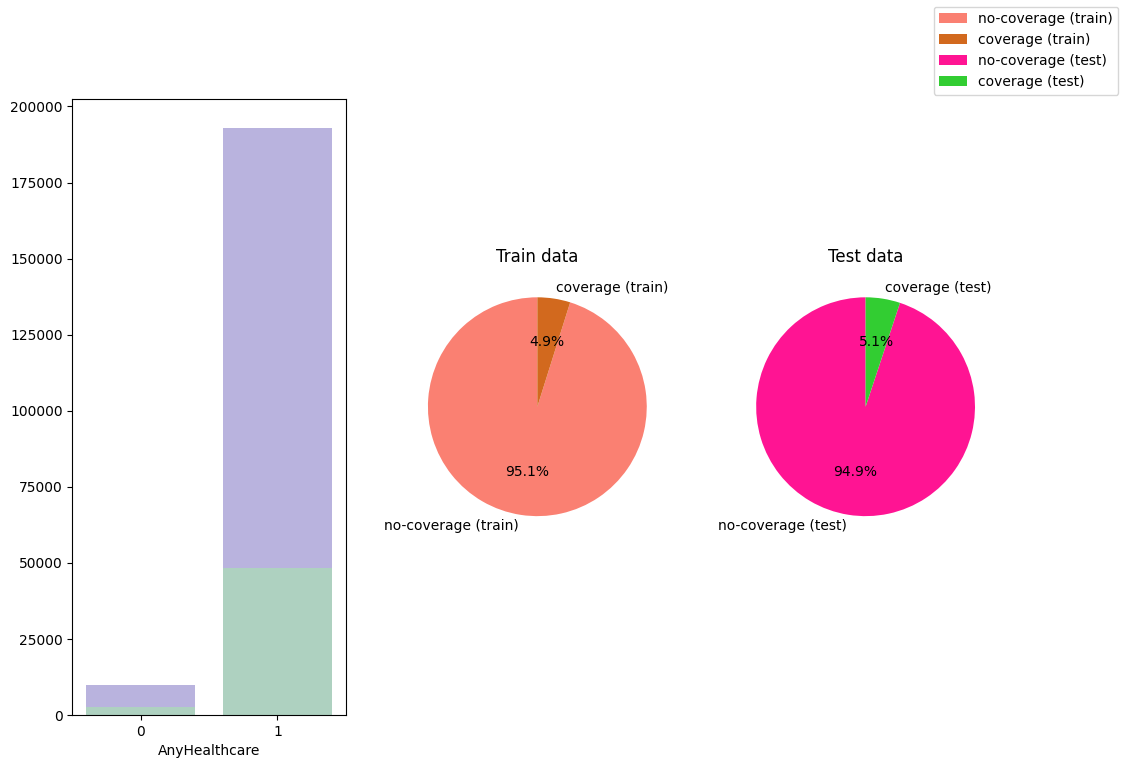

----AnyHealthcare----
Train data
               Counts  Percentage
AnyHealthcare                    
1              192902    0.951494
0                9834    0.048506

Test data
               Counts  Percentage
AnyHealthcare                    
1               48153    0.949089
0                2583    0.050911

          data_model     data_test
count  202736.000000  50736.000000
mean        0.951494      0.949089
std         0.214834      0.219817
min         0.000000      0.000000
25%         1.000000      1.000000
50%         1.000000      1.000000
75%         1.000000      1.000000
max         1.000000      1.000000


In [30]:
uni_cat_plot('AnyHealthcare', ['no-coverage', 'coverage'])
uni_stat_summary(column='AnyHealthcare')

#### 2.1.11. NoDocbcCost Analysis

Categorical data:
- 0: Don't visit doctor due to cost
- 1: Visit doctor

Duration: 12 months

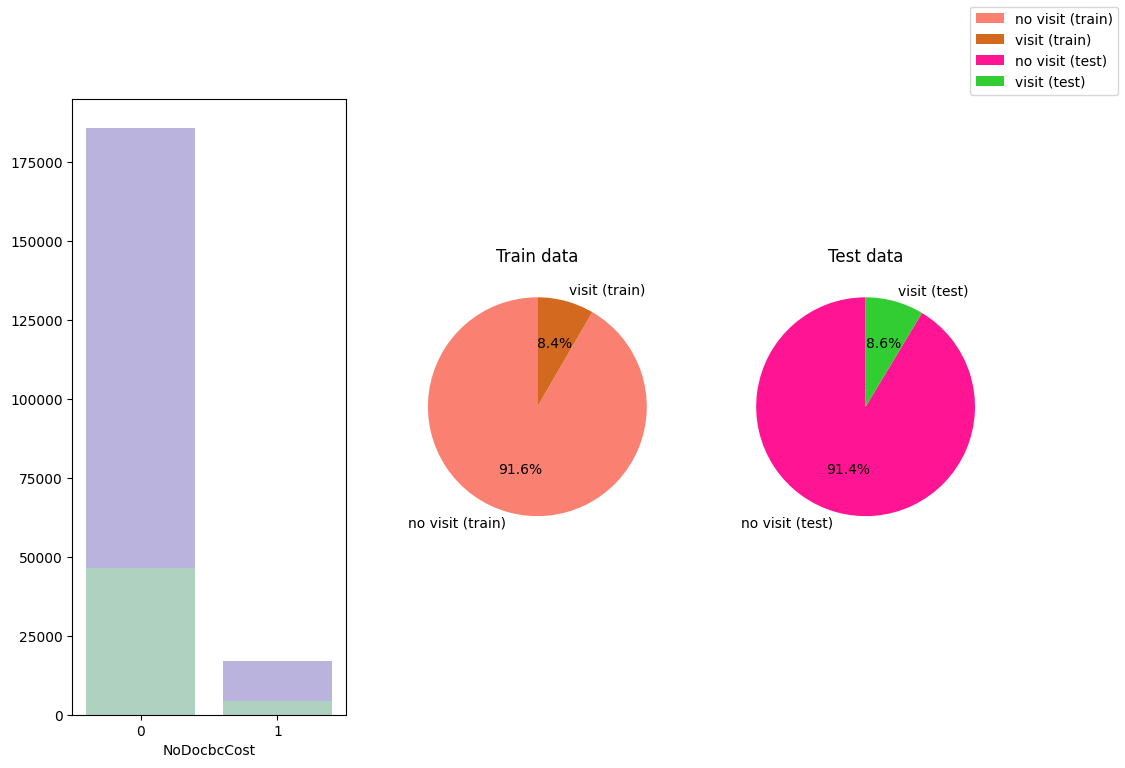

----NoDocbcCost----
Train data
             Counts  Percentage
NoDocbcCost                    
0            185751    0.916221
1             16985    0.083779

Test data
             Counts  Percentage
NoDocbcCost                    
0             46367    0.913888
1              4369    0.086112

          data_model     data_test
count  202736.000000  50736.000000
mean        0.083779      0.086112
std         0.277057      0.280533
min         0.000000      0.000000
25%         0.000000      0.000000
50%         0.000000      0.000000
75%         0.000000      0.000000
max         1.000000      1.000000


In [31]:
uni_cat_plot('NoDocbcCost', ['no visit', 'visit'])
uni_stat_summary(column='NoDocbcCost')

#### 2.1.12.

#### 2.1.13.

#### 2.1.14.

#### 2.1.15.

#### 2.1.16.

#### 2.1.17.

#### 2.1.18.

#### 2.1.19.

#### 2.1.20.

#### 2.1.21.

#### 2.1.22.